In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as anim

In [2]:
TMin, TMax, N = 0.,30., 2001
t = np.linspace(TMin, TMax, N)

In [3]:
def GetAr(r,theta,vr,vtheta, g = 9.8, k = 5., m = 2., l = 3.):
    ar = k*(l-r)/m + g*np.cos(theta) + r*vtheta**2  - 0.2*vr
    return ar

In [4]:
def GetAt(r,theta,vr,vtheta, g = 9.8, k = 5., m = 2., l = 3.):
    if r == 0.:
        print('No calculable')
        return 0.
    else:
        at = - g*np.sin(theta)/r - 2*vr*vtheta/r - 0.2*vtheta
        return at

In [5]:
def GetBeeman(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    print('--- Solving using the beeman integrator ---',h)
    
    
    r = np.zeros(N)
    theta = np.zeros(N)
    vtheta = np.zeros(N)
    vr = np.zeros(N)
    
    r[0] = r0[0]
    theta[0] = r0[1]
    vr[0] = r0[2]
    vtheta[0] = r0[3]
    
    # Inicializamos con euler
    r[1] = r[0] + h*vr[0]
    theta[1] = theta[0] + h*vtheta[0]
    vr[1] = vr[0] + h*GetAr(r[0],theta[0],vr[0],vtheta[0])
    vtheta[1] = vtheta[0] + h*GetAt(r[0],theta[0],vr[0],vtheta[0])
    
    
    for i in range(2,N):
            
        # Presente
        ar = GetAr(r[i-1],theta[i-1],vr[i-1],vtheta[i-1])
        at = GetAt(r[i-1],theta[i-1],vr[i-1],vtheta[i-1])
        # pasado
        par = GetAr(r[i-2],theta[i-2],vr[i-2],vtheta[i-2])
        pat = GetAt(r[i-2],theta[i-2],vr[i-2],vtheta[i-2])
      
        r[i] = r[i-1] + h*vr[i-1] + (4.*ar - par)*h**2 /6.
        theta[i] = theta[i-1] + h*vtheta[i-1] + (4.*at - pat)*h**2 /6.
        
        vr[i] = vr[i-1] + 0.5*(3*ar - par)*h
        vtheta[i] = vtheta[i-1] + 0.5*(3*at - pat)*h
        
        # Corrector en el futuro
    
        far = GetAr(r[i],theta[i],vr[i],vtheta[i])
        fat = GetAt(r[i],theta[i],vr[i],vtheta[i])
    
        vr[i] =     vr[i-1]     + (5*far/12. + 2*ar/3. - par/12.)*h
        vtheta[i] = vtheta[i-1] + (5*fat/12. + 2*at/3. - pat/12.)*h
    
    sol = np.zeros((len(t),4))
    sol[:,0] = r
    sol[:,1] = theta
    sol[:,2] = vr
    sol[:,3] = vtheta
    
    return sol

In [6]:
r0 = [15.0,np.pi/8,0,0]
solution_ = GetBeeman(r0,t)

--- Solving using the beeman integrator --- 0.015


In [7]:
def Reduce(s,t,factor):
    
    news = np.array([s[0]])
    newt = np.array([t[0]])
    
    for i in range(1,len(s)):
        if i%factor == 0:
            news = np.vstack([news,s[i]])
            newt = np.vstack([newt,t[i]])
            
    return news,newt

In [8]:
solution, rt = Reduce(solution_,t,20)

In [9]:
# Paso a cartesianas
x = solution[:,0]*np.cos(solution[:,1] - 0.5*np.pi)
y = solution[:,0]*np.sin(solution[:,1] - 0.5*np.pi)

<IPython.core.display.Javascript object>


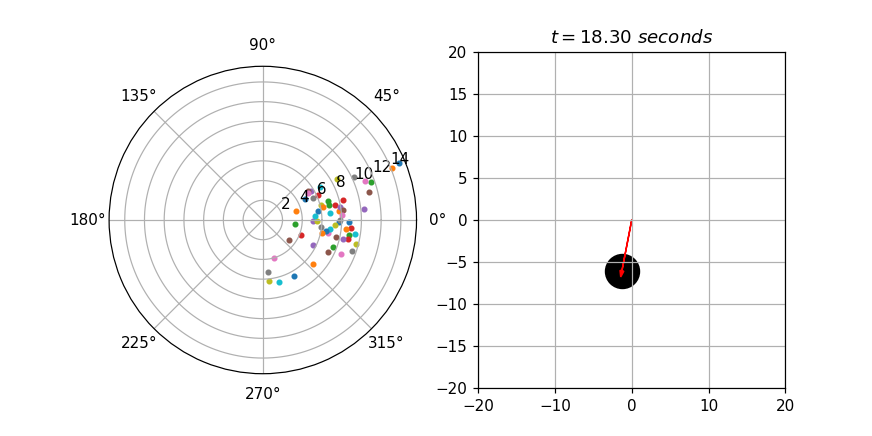

In [10]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1, projection='polar')
ax2 = fig.add_subplot(1,2,2)

def init():
    
    #ax1.set_rmin(0.)
    #ax1.set_rmax(10.)
 
    ax2.set_xlim(-20,20)
    ax2.set_ylim(-20,20)
    ax2.grid()

def Update(i):
    
   # plot = ax1.clear()
    plot = ax2.clear()
    init()
    
    plot = ax1.scatter(solution[i,1],solution[i,0],marker='.')
    
    plot = ax2.set_title(r'$t=%.2f \ seconds$' %(rt[i]))
    plot = ax2.scatter(x[i],y[i],color='k',marker='o',s=500)
    plot = ax2.arrow(0.,0.,x[i],y[i],color='r',head_width=0.5)
    
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(rt),init_func=init)

In [11]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=10, metadata=dict(artist='Me'))
#Animation.save('Oscilador.mp4', writer=writer_)

<IPython.core.display.Javascript object>


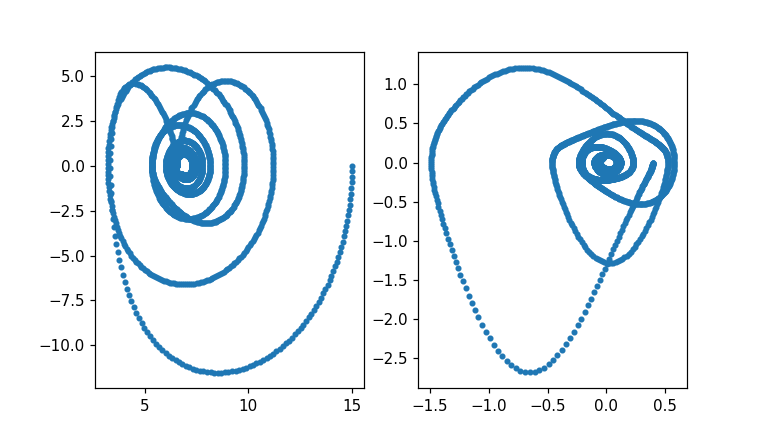

In [12]:
fig2 = plt.figure(figsize=(7,4))
ax3 = fig2.add_subplot(121)
ax4 = fig2.add_subplot(122)
ax3.scatter(solution_[:,0],solution_[:,2],marker='.')
ax4.scatter(solution_[:,1],solution_[:,3],marker='.')